# Module 2: APIs

In the digital world, data is often transported through online servers called APIs. Understanding how they work, and being able to work with them is essential for a Data Engineer.

During this training we will go into detail about APIs, and how to work with them in Python. During the training we will follow the following outline:
1. What is an API?
2. Getting acces to an API using Python
3. Types of requests
4. Customizing your information from APIs

Enjoy!

Run the following cell to import all necessary libraries.

In [ ]:
import requests
import pprint
import pandas as pd

## Section 1: What is an API? (15 min)

An Application Programming Interface, or an API, is a server that you can use to retrieve and send data to using code. 
APIs are most commonly used to retrieve or send data (depends on which way you look at it).

When we want to receive data from an API, we need to make a request. 
Requests are used all over the web. For instance, when you visit a website, your web browser makes a request to that specific web server, which will respond with the content of the corresponding web page.

APIs work in the same way. You send a request to the server, and the API gives a response depending on your request. Take a look at the picture below for a simple overview.

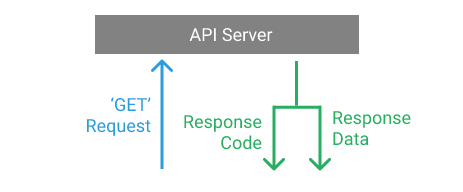

In the image above, there are several important aspects to note. 
1. On top there is the API that processes requests and replies with a certain response. 
2. On the left (blue arrow) is the request one sends to the API. The request can be done using Python for example. 
3. On the right (green arrows) there is the response of the API. The API only sends a response after a request has been done. The response always consists of a 'response code' and the response itself (containing the data).

Let's focus on the response code first. The 'response code' gives information on how the response was processed. There are a lot of different codes possible, but you'll definitely recognize one of them (see below).

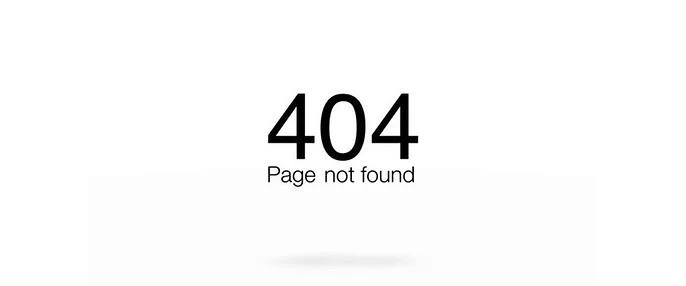

Code 404: page not found is a well known happenstance on the internet. But most people don't actually realize that it stems from the response codes. In the table below there is an overview of the most common response codes. 

| Code | Meaning | Description |
| --- | --- | --- |
| 200 | OK | The requested action was successful. |
| 201 | Created | A new resource was created. |
| 202 | Accepted | The request was received, but no modification has been made yet. |
| 204 | No Content | The request was successful, but the response has no content. |
| 400 | Bad Request | The request was malformed. |
| 401 | Unauthorized | The client is not authorized to perform the requested action. |
| 404 | Not Found | The requested resource was not found. |
| 415 | Unsupported Media Type | The request data format is not supported by the server. |
| 422 | Unprocessable Entity | The request data was properly formatted but contained invalid or missing data. |
| 500 | Internal Server Error | The server threw an error when processing the request. |

As you can see in the table, there are a lot of different options (and these are just the most common ones). The response codes can provide some extra information on why or why not the response is the way it is.

But it's time to see an API in action. Usually, the data response of an API is in the form of a JSON file. For those that completed the JSON module, it should all be very familiar. Let's very have a look at an API response in a browser.



Navigate in a browser to the following link:
https://anapioficeandfire.com/api/characters/583

You should see something similar to the screenshot below.
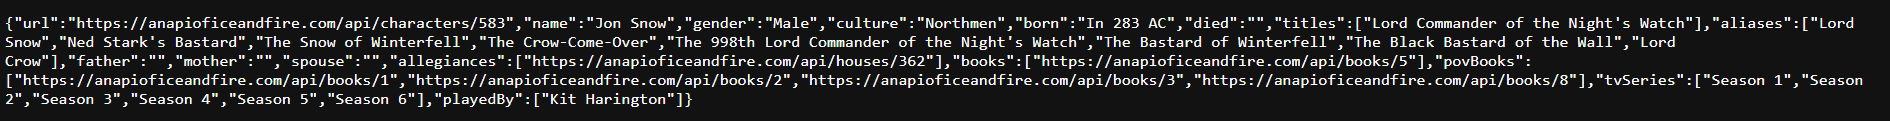

And now navigate to the following link in a browser:
https://pokeapi.co/api/v2/pokemon/pikachu

You should see something similar to the screenshot below.
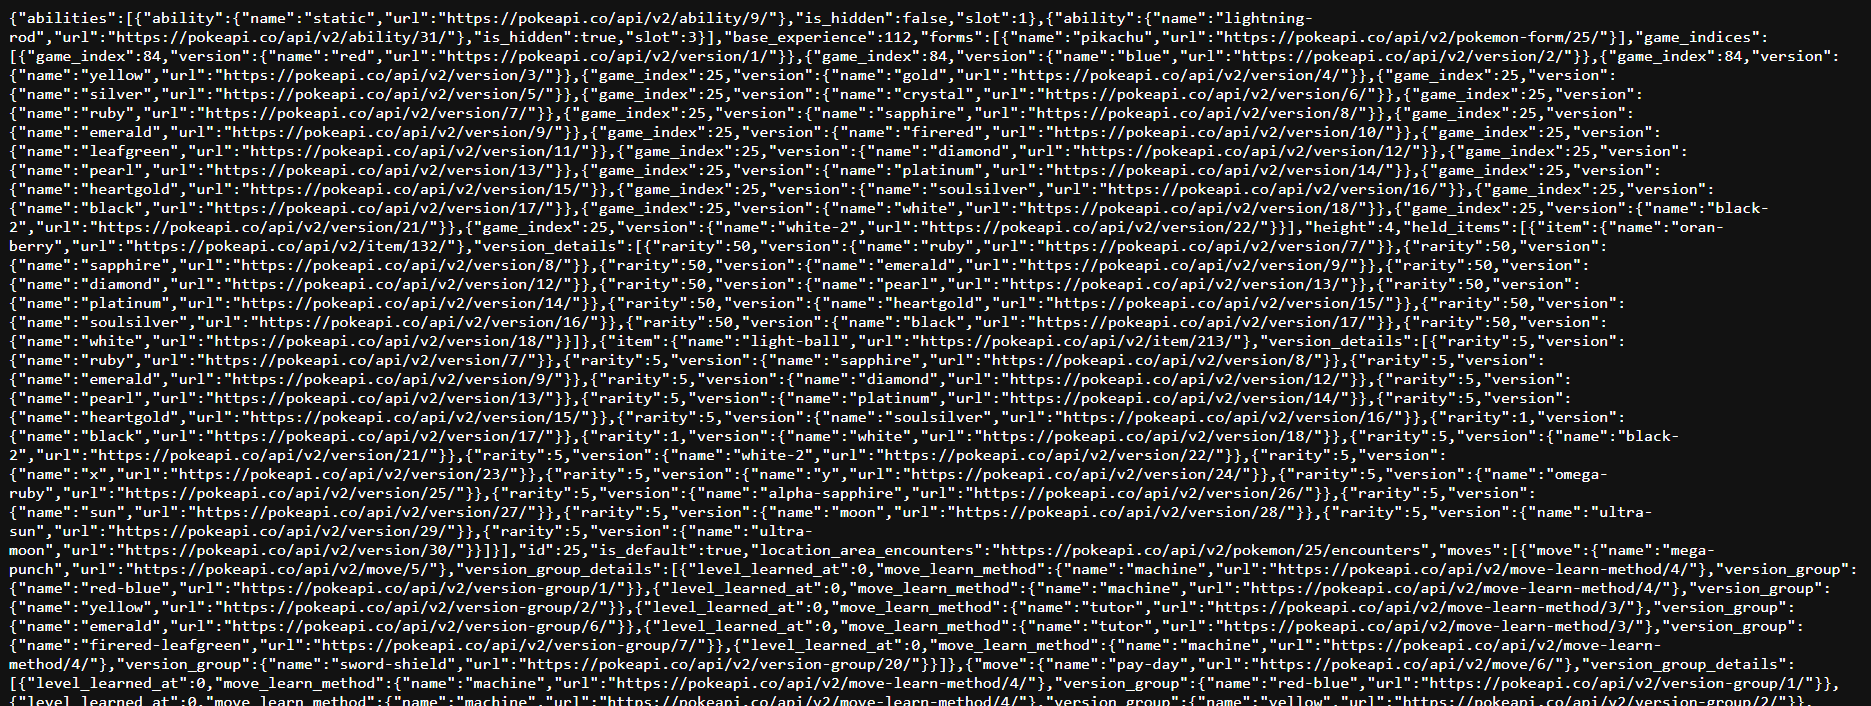

When comparing the two responses, you can see that some responses are a bit more extensive than other responses. It might also be difficult to extract information in this way. Luckily there is a Pythonic solution for that; the library requests.

## Section 2: Getting acces to an API using Python (45 min)

Now that we had a look at how APIs work, we want to work with them! And we want to work with them in Python!
For working with APIs in Python, we can use the library requests. The requests library is a very versatile library used for making requests, similar to what you did in the webbrowser. We can use the library to retrieve the response of a request. It can be used for every URL, including APIs.

With the requests library we can do a lot of things regarding APIs, including:
- Sending a request to an API
- Checking status codes
- Retrieving information from the request

The requests library is essential in working with APIs within Python. As with (almost) all decent libraries, there is an extensive amount of documentation that can help you understand the functionalities of the library. 

While working with Python it is essential that you learn how to read documentation. This will help speed your work up, and improve your understanding of the library. So, have a look: https://requests.readthedocs.io/en/latest/. 

Using the requests library you can send a request to an API. We'll be using an API you've seen before. The response of the API can be stored, and then accessed. Let's have a look at the different options the requests library provides.

Let's first actually retrieve a response. This can be done using the 'requests.get' option.

In [2]:
import requests
import pprint

URL = "https://anapioficeandfire.com/api/characters/583"

response = requests.get(URL)

Now that we have a response. Let's check the status. We can do that using the '.status_code' option. 

In [3]:
print(response.status_code)

200


Great. The response code '200' indicates that the requested action was succesful. Let's move on to other interesting options, such as '.encoding' and '.text'. This provides us with information on the encoding of the text, and the entire string.

In [4]:
print(response.encoding)
print('')
print(response.text)

utf-8

{"url":"https://anapioficeandfire.com/api/characters/583","name":"Jon Snow","gender":"Male","culture":"Northmen","born":"In 283 AC","died":"","titles":["Lord Commander of the Night's Watch"],"aliases":["Lord Snow","Ned Stark's Bastard","The Snow of Winterfell","The Crow-Come-Over","The 998th Lord Commander of the Night's Watch","The Bastard of Winterfell","The Black Bastard of the Wall","Lord Crow"],"father":"","mother":"","spouse":"","allegiances":["https://anapioficeandfire.com/api/houses/362"],"books":["https://anapioficeandfire.com/api/books/5"],"povBooks":["https://anapioficeandfire.com/api/books/1","https://anapioficeandfire.com/api/books/2","https://anapioficeandfire.com/api/books/3","https://anapioficeandfire.com/api/books/8"],"tvSeries":["Season 1","Season 2","Season 3","Season 4","Season 5","Season 6"],"playedBy":["Kit Harington"]}


Now let's move on to the most interesting part of the response. The actual json response. This should contain the information we requested.

In [5]:
pprint.pprint(response.json())

{'aliases': ['Lord Snow',
             "Ned Stark's Bastard",
             'The Snow of Winterfell',
             'The Crow-Come-Over',
             "The 998th Lord Commander of the Night's Watch",
             'The Bastard of Winterfell',
             'The Black Bastard of the Wall',
             'Lord Crow'],
 'allegiances': ['https://anapioficeandfire.com/api/houses/362'],
 'books': ['https://anapioficeandfire.com/api/books/5'],
 'born': 'In 283 AC',
 'culture': 'Northmen',
 'died': '',
 'father': '',
 'gender': 'Male',
 'mother': '',
 'name': 'Jon Snow',
 'playedBy': ['Kit Harington'],
 'povBooks': ['https://anapioficeandfire.com/api/books/1',
              'https://anapioficeandfire.com/api/books/2',
              'https://anapioficeandfire.com/api/books/3',
              'https://anapioficeandfire.com/api/books/8'],
 'spouse': '',
 'titles': ["Lord Commander of the Night's Watch"],
 'tvSeries': ['Season 1',
              'Season 2',
              'Season 3',
              'Season

Now it's time for you to try these things.

#### Assignment 1: Getting acces to an API using Python 1

Use the following API; https://pokeapi.co/api/v2/pokemon/pikachu.
Send a request, and prove it was succesful by checking the status code, and making sure it's '200'.

In [10]:
### FILL IN

True


#### Assignment 2: Getting acces to an API using Python 2

Use the following API; https://pokeapi.co/api/v2/pokemon/pikachu.
Send a request, and print the json response. You could use the pprint library to print in a way that's more clear. 

In [11]:
### FILL IN

{'abilities': [{'ability': {'name': 'static',
    'url': 'https://pokeapi.co/api/v2/ability/9/'},
   'is_hidden': False,
   'slot': 1},
  {'ability': {'name': 'lightning-rod',
    'url': 'https://pokeapi.co/api/v2/ability/31/'},
   'is_hidden': True,
   'slot': 3}],
 'base_experience': 112,
 'forms': [{'name': 'pikachu',
   'url': 'https://pokeapi.co/api/v2/pokemon-form/25/'}],
 'game_indices': [{'game_index': 84,
   'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}},
  {'game_index': 84,
   'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}},
  {'game_index': 84,
   'version': {'name': 'yellow',
    'url': 'https://pokeapi.co/api/v2/version/3/'}},
  {'game_index': 25,
   'version': {'name': 'gold', 'url': 'https://pokeapi.co/api/v2/version/4/'}},
  {'game_index': 25,
   'version': {'name': 'silver',
    'url': 'https://pokeapi.co/api/v2/version/5/'}},
  {'game_index': 25,
   'version': {'name': 'crystal',
    'url': 'https://pokeapi.co/a

These are just the basics. There another very important key-word that can be used in retrieving a response, and that's the 'params' key-word. It can be used during the 'requests.get'. Using this key-word, you can add additional parameters to your requests. Which can be very useful. Which parameters can be used can be found in the documentation of the API. 

Below there is an example. We are using an API about the world of Game of Thrones; https://anapioficeandfire.com/. On the website of the API you can navigate to the page of the documentation; https://anapioficeandfire.com/Documentation, from which you can learn a lot. For example we can see which parameters we can use in the request. We want to retrieve information on some of the different houses in the world of Game of Thrones. By reading the documentation of the API we can find which parameters to use. 


Let's put it into practice! See the example below!

In [8]:
import requests
import pprint

URL = "https://anapioficeandfire.com/api/houses"
PARAMETERS = {"region": "The North", 
              "hasWords": True,
              "page": 1}

response = requests.get(URL, params=PARAMETERS)

pprint.pprint(response.json())

[{'ancestralWeapons': [''],
  'cadetBranches': [],
  'coatOfArms': 'A red flayed man on pink de sang',
  'currentLord': 'https://anapioficeandfire.com/api/characters/933',
  'diedOut': '',
  'founded': 'Age of Heroes',
  'founder': '',
  'heir': 'https://anapioficeandfire.com/api/characters/849',
  'name': 'House Bolton of the Dreadfort',
  'overlord': 'https://anapioficeandfire.com/api/houses/16',
  'region': 'The North',
  'seats': ['The Dreadfort'],
  'swornMembers': ['https://anapioficeandfire.com/api/characters/196',
                   'https://anapioficeandfire.com/api/characters/314',
                   'https://anapioficeandfire.com/api/characters/849',
                   'https://anapioficeandfire.com/api/characters/933',
                   'https://anapioficeandfire.com/api/characters/1084',
                   'https://anapioficeandfire.com/api/characters/1159',
                   'https://anapioficeandfire.com/api/characters/1208',
                   'https://anapioficeandfi

As you can see, the parameters are passed along in the form of a dictionary using a key-value pair per parameter.

#### Assignment 3: Getting acces to an API using Python 3

Using the same API on Game of Thrones houses, retrieve all houses that have 'House Words', and have 'an Ancestral Weapons'.
There should be 7 in total.

In [16]:
### FILL IN

7 

[{'ancestralWeapons': ['Vigilance'],
  'cadetBranches': [],
  'coatOfArms': 'Cendrée, a tower argent with a beacon on fire gules',
  'currentLord': 'https://anapioficeandfire.com/api/characters/635',
  'diedOut': '',
  'founded': 'Age of Dawn',
  'founder': 'https://anapioficeandfire.com/api/characters/2062',
  'heir': 'https://anapioficeandfire.com/api/characters/159',
  'name': 'House Hightower of the Hightower',
  'overlord': 'https://anapioficeandfire.com/api/houses/398',
  'region': 'The Reach',
  'seats': ['The Hightower, Oldtown'],
  'swornMembers': ['https://anapioficeandfire.com/api/characters/29',
                   'https://anapioficeandfire.com/api/characters/69',
                   'https://anapioficeandfire.com/api/characters/76',
                   'https://anapioficeandfire.com/api/characters/102',
                   'https://anapioficeandfire.com/api/characters/159',
                   'https://anapioficeandfire.com/api/characters/239',
                   'https://

Let's make it more interesting. Some APIs restrict the size of the response you'll get. And this is the same for the API we are currently using (Game of Thrones). The restriction is set to a maximum of 10 in this case.In order to bypass that, we can send multiple responses. And from each responses we'll want to retrieve information.

#### Assignment 4: Getting acces to an API using Python 4

Using the same API on Game of Thrones houses, retrieve all houses that have died out.
Create a list, and add each retrieved 'house' to that list. 
There should be 20 in total, so it won't take to many responses.

In [20]:
### FILL IN

["House Blackfyre of King's Landing", 'House Brightstone', 'House Cargyll', 'House Darklyn of Duskendale', 'House Dryland', 'House Durrandon', 'House Gardener of Highgarden', 'House Harroway of Harrenhal', 'House Hoare of Orkmont', 'House Hollard', 'House Lothston of Harrenhal', 'House Osgrey of Leafy Lake', 'House Parren', 'House Qoherys of Harrenhal', 'House Reyne of Castamere', 'House Shell', 'House Strong of Harrenhal', 'House Tarbeck of Tarbeck Hall', 'House Teague', 'House Toyne']


Great. Now it's time to put that documentation-reading to use. Check the documentation on; https://anapioficeandfire.com/Documentation to complete the following assignment.

#### Assignment 5: Getting acces to an API using Python 5

Using the API on Game of Thrones characters, retrieve all characters that have died, and that belong to the 'Northmen' culture.
Create a list, and add each retrieved 'character' to that list.
There should be 36 in total, so it won't take to many responses.

In [31]:
### FILL IN

36
